In [ ]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cisco_news.csv to cisco_news.csv


In [ ]:
#getting the data
df1 = pd.read_csv('cisco_news.csv', parse_dates=['Date'])
df1.head()

,Date,News
0,2021-06-18,Wells Fargo updates on its best-ideas 'Signatu...
1,2021-05-21,Apple App Store profits look &quot;disproporti...
2,2021-05-07,The Epic Battle Over Apple&quot;s App Store 3 ...
3,2021-05-04,Nasdaq ends sharply lower in tech sell-off Glo...
4,2021-04-23,"Tesla, Procter & Gamble, Apple: Stocks That De..."


In [ ]:
df1.isnull().sum()

Date    45
News    45
dtype: int64

In [ ]:
df1.dropna()

,Date,News
0,2021-06-18,Wells Fargo updates on its best-ideas 'Signatu...
1,2021-05-21,Apple App Store profits look &quot;disproporti...
2,2021-05-07,The Epic Battle Over Apple&quot;s App Store 3 ...
3,2021-05-04,Nasdaq ends sharply lower in tech sell-off Glo...
4,2021-04-23,"Tesla, Procter & Gamble, Apple: Stocks That De..."
...,...,...
215,2016-05-09,Apple has known for Years that 99% of Malware ...
216,2016-04-18,Apples Worldwide Developers Conference Kicks O...
217,2016-04-06,Apple Inc. (AAPL) Shares Sold by Princeton Cap...
218,2016-03-04,Stock Update (NASDAQ:AAPL): Ad-Blocking Jumps ...


In [ ]:
df1.dropna().isnull().sum()

Date    0
News    0
dtype: int64

In [ ]:
df1.sort_index(inplace=True)

In [ ]:
df1.head()

,Date,News
0,2021-06-18,Wells Fargo updates on its best-ideas 'Signatu...
1,2021-05-21,Apple App Store profits look &quot;disproporti...
2,2021-05-07,The Epic Battle Over Apple&quot;s App Store 3 ...
3,2021-05-04,Nasdaq ends sharply lower in tech sell-off Glo...
4,2021-04-23,"Tesla, Procter & Gamble, Apple: Stocks That De..."


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cisco.csv.csv to cisco.csv.csv


In [ ]:
#getting the data
df2 = pd.read_csv('cisco.csv.csv', parse_dates=['Date'])
df2.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-07-02,$53.54,15068260,$53.19,$53.62,$52.84
1,2021-07-01,$53.44,15074800,$53.05,$53.60,$53
2,2021-06-30,$53,15826640,$52.95,$53.07,$52.62
3,2021-06-29,$52.91,10926110,$52.89,$53.19,$52.77
4,2021-06-28,$52.96,14008660,$53.16,$53.29,$52.92


In [ ]:
#rename the column
df2.rename(columns = {'Close/Last' : 'Close'}, inplace = True)

In [ ]:
df2.sort_values('Date', inplace=True)

In [ ]:
df2.reset_index()

,index,Date,Close,Volume,Open,High,Low
0,1257,2016-07-06,$28.72,24843840,$28.45,$28.77,$28.17
1,1256,2016-07-07,$28.74,17395210,$28.72,$28.90,$28.61
2,1255,2016-07-08,$29.26,24646250,$28.91,$29.28,$28.88
3,1254,2016-07-11,$29.43,21688010,$29.34,$29.70,$29.26
4,1253,2016-07-12,$29.61,22137610,$29.72,$29.74,$29.52
...,...,...,...,...,...,...,...
1253,4,2021-06-28,$52.96,14008660,$53.16,$53.29,$52.92
1254,3,2021-06-29,$52.91,10926110,$52.89,$53.19,$52.77
1255,2,2021-06-30,$53,15826640,$52.95,$53.07,$52.62
1256,1,2021-07-01,$53.44,15074800,$53.05,$53.60,$53


In [ ]:
df3 = pd.merge(df1,df2, how='inner', on=['Date'])

In [ ]:
df3.head()

,Date,News,Close,Volume,Open,High,Low
0,2021-06-18,Wells Fargo updates on its best-ideas 'Signatu...,$52.07,35758260,$52.81,$52.84,$51.88
1,2021-05-21,Apple App Store profits look &quot;disproporti...,$52.43,24468370,$52.77,$52.93,$52.24
2,2021-05-07,The Epic Battle Over Apple&quot;s App Store 3 ...,$53.43,24146010,$52.48,$53.68,$52.22
3,2021-05-04,Nasdaq ends sharply lower in tech sell-off Glo...,$50.71,18164790,$51.11,$51.23,$50.30
4,2021-04-23,"Tesla, Procter & Gamble, Apple: Stocks That De...",$51.91,14017740,$51.50,$52.13,$51.18


In [ ]:
# Removing $ sign and converting the string numeric values to float values
df3["Close"] = df3["Close"].str.replace('$', '').astype(float)
df3["Open"] = df3["Open"].str.replace('$', '').astype(float)
df3["High"] = df3["High"].str.replace('$', '').astype(float)
df3["Low"] = df3["Low"].str.replace('$', '').astype(float)

In [ ]:
df3.head()

,Date,News,Close,Volume,Open,High,Low
0,2021-06-18,Wells Fargo updates on its best-ideas 'Signatu...,52.07,35758260,52.81,52.84,51.88
1,2021-05-21,Apple App Store profits look &quot;disproporti...,52.43,24468370,52.77,52.93,52.24
2,2021-05-07,The Epic Battle Over Apple&quot;s App Store 3 ...,53.43,24146010,52.48,53.68,52.22
3,2021-05-04,Nasdaq ends sharply lower in tech sell-off Glo...,50.71,18164790,51.11,51.23,50.30
4,2021-04-23,"Tesla, Procter & Gamble, Apple: Stocks That De...",51.91,14017740,51.50,52.13,51.18


In [ ]:
df3.set_index("Date", inplace = True)
df3.head()

,News,Close,Volume,Open,High,Low
Date,,,,,,
2021-06-18,Wells Fargo updates on its best-ideas 'Signatu...,52.07,35758260,52.81,52.84,51.88
2021-05-21,Apple App Store profits look &quot;disproporti...,52.43,24468370,52.77,52.93,52.24
2021-05-07,The Epic Battle Over Apple&quot;s App Store 3 ...,53.43,24146010,52.48,53.68,52.22
2021-05-04,Nasdaq ends sharply lower in tech sell-off Glo...,50.71,18164790,51.11,51.23,50.30
2021-04-23,"Tesla, Procter & Gamble, Apple: Stocks That De...",51.91,14017740,51.50,52.13,51.18


In [ ]:
df3.sort_index(ascending=True,inplace=True)
df3.head()

,News,Close,Volume,Open,High,Low
Date,,,,,,
2016-07-13,Pokemon GO could be next big marketing tool fo...,29.75,18023570,29.72,29.83,29.58
2016-08-18,The Rise of Local Smartphone Vendors in China ...,30.48,48656960,30.41,30.67,30.06
2016-08-29,A Sneak Peek at the Apple Inc. iPhone 7 and 7 ...,31.58,21049980,31.43,31.70,31.41
2016-09-02,Has Apple Cancelled the iPhone 7 Pro? (AAPL) W...,31.83,18144570,31.65,31.95,31.65
2016-09-09,Will Apple Inc. Integrate Intel Corporation&qu...,30.85,25379810,31.14,31.34,30.85


In [ ]:
df3.shape

(190, 6)

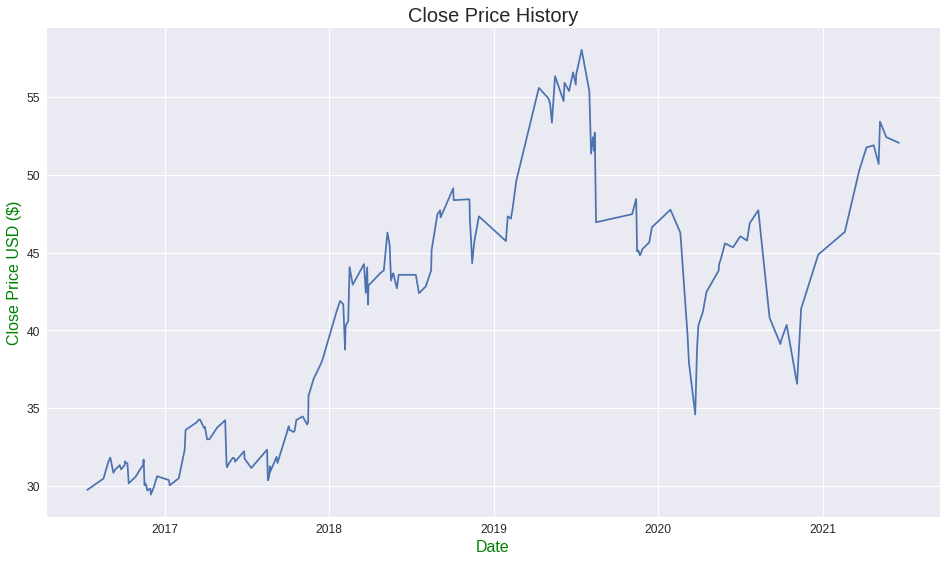

In [ ]:
# Visualizing the closing price history
plt.figure(figsize=(16,9))
plt.title('Close Price History', fontsize = 20)
plt.plot(df3['Close'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
import os

In [ ]:
df3.to_csv('News and Historical data.csv')

In [ ]:
os.getcwd()

'/content'

In [ ]:
df3['compound'] = ''
df3['negative'] = ''
df3['neutral'] = ''
df3['positive'] = ''
df3.head()

,News,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2016-07-13,Pokemon GO could be next big marketing tool fo...,29.75,18023570,29.72,29.83,29.58,,,,
2016-08-18,The Rise of Local Smartphone Vendors in China ...,30.48,48656960,30.41,30.67,30.06,,,,
2016-08-29,A Sneak Peek at the Apple Inc. iPhone 7 and 7 ...,31.58,21049980,31.43,31.70,31.41,,,,
2016-09-02,Has Apple Cancelled the iPhone 7 Pro? (AAPL) W...,31.83,18144570,31.65,31.95,31.65,,,,
2016-09-09,Will Apple Inc. Integrate Intel Corporation&qu...,30.85,25379810,31.14,31.34,30.85,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
df3['compound'] = df3['News'].apply(lambda x: sid.polarity_scores(x)['compound'])
df3['negative'] = df3['News'].apply(lambda x: sid.polarity_scores(x)['neg'])
df3['neutral'] = df3['News'].apply(lambda x: sid.polarity_scores(x)['neu'])
df3['positive'] = df3['News'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
df3.head()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,News,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,
2016-07-13,Pokemon GO could be next big marketing tool fo...,29.75,18023570,29.72,29.83,29.58,0.7481,0.055,0.873,0.072
2016-08-18,The Rise of Local Smartphone Vendors in China ...,30.48,48656960,30.41,30.67,30.06,-0.9599,0.107,0.814,0.080
2016-08-29,A Sneak Peek at the Apple Inc. iPhone 7 and 7 ...,31.58,21049980,31.43,31.70,31.41,0.0770,0.056,0.884,0.060
2016-09-02,Has Apple Cancelled the iPhone 7 Pro? (AAPL) W...,31.83,18144570,31.65,31.95,31.65,0.9470,0.071,0.842,0.087
2016-09-09,Will Apple Inc. Integrate Intel Corporation&qu...,30.85,25379810,31.14,31.34,30.85,0.9798,0.060,0.853,0.087


In [ ]:
df3.columns

Index(['News', 'Close', 'Volume', 'Open', 'High', 'Low', 'compound',
       'negative', 'neutral', 'positive'],
      dtype='object')

In [ ]:
#data.drop('Headlines', inplace=True, axis=1)

# rearranging the columns of the whole stock_data
df3 = df3[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# displaying the final stock_data
df3.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2016-07-13,29.75,0.7481,0.055,0.873,0.072,29.72,29.83,29.58,18023570
2016-08-18,30.48,-0.9599,0.107,0.814,0.080,30.41,30.67,30.06,48656960
2016-08-29,31.58,0.0770,0.056,0.884,0.060,31.43,31.70,31.41,21049980
2016-09-02,31.83,0.9470,0.071,0.842,0.087,31.65,31.95,31.65,18144570
2016-09-09,30.85,0.9798,0.060,0.853,0.087,31.14,31.34,30.85,25379810


In [ ]:
stockdata=df3.to_csv('stockdata.csv')

In [ ]:
stockdata = pd.read_csv('stockdata.csv', index_col = False)

stockdata.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

stockdata.set_index('Date', inplace=True)

stockdata.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2016-07-13,29.75,0.7481,0.055,0.873,0.072,29.72,29.83,29.58,18023570
2016-08-18,30.48,-0.9599,0.107,0.814,0.080,30.41,30.67,30.06,48656960
2016-08-29,31.58,0.0770,0.056,0.884,0.060,31.43,31.70,31.41,21049980
2016-09-02,31.83,0.9470,0.071,0.842,0.087,31.65,31.95,31.65,18144570
2016-09-09,30.85,0.9798,0.060,0.853,0.087,31.14,31.34,30.85,25379810


In [ ]:
stockdata.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
stockdata.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,1.900000e+02
mean,40.819895,0.753372,0.057532,0.838826,0.103711,40.792000,41.189158,40.408421,2.491887e+07
std,8.015476,0.572641,0.025885,0.034404,0.028770,7.951553,8.082090,7.869391,1.196158e+07
min,29.450000,-0.998400,0.012000,0.726000,0.037000,29.720000,29.830000,29.400000,8.809738e+06
25%,32.865000,0.939650,0.041000,0.814000,0.084250,32.502500,32.935000,32.435000,1.744216e+07
50%,41.800000,0.982350,0.054000,0.842000,0.102000,42.170000,42.555000,41.600000,2.196696e+07
75%,46.565000,0.994600,0.067000,0.863000,0.120750,46.535000,47.035000,46.187500,2.730315e+07
max,58.050000,0.999400,0.171000,0.914000,0.188000,58.000000,58.230000,57.870000,8.541644e+07


In [ ]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 2016-07-13 to 2021-06-18
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     190 non-null    float64
 1   compound  190 non-null    float64
 2   negative  190 non-null    float64
 3   neutral   190 non-null    float64
 4   positive  190 non-null    float64
 5   Open      190 non-null    float64
 6   High      190 non-null    float64
 7   Low       190 non-null    float64
 8   Volume    190 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 14.8+ KB


In [ ]:
close_price = stockdata.iloc[:,0] 

print("Close Price:")
close_price

Close Price:


Date
2016-07-13    29.75
2016-08-18    30.48
2016-08-29    31.58
2016-09-02    31.83
2016-09-09    30.85
              ...  
2021-04-23    51.91
2021-05-04    50.71
2021-05-07    53.43
2021-05-21    52.43
2021-06-18    52.07
Name: Close, Length: 190, dtype: float64

In [ ]:
need_data = pd.concat([close_price], axis=1)

need_data.columns = ['close_price']  
need_data.tail(20)

,close_price
Date,
2020-06-15,45.35
2020-07-01,46.06
2020-07-16,45.78
2020-07-22,46.90
2020-08-10,47.73
2020-09-04,40.82
2020-09-28,39.13
2020-09-30,39.39
2020-10-12,40.36


In [ ]:
dataset = need_data.values

In [ ]:
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

152

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.01048951]
 [0.03601399]
 [0.07447552]
 [0.08321678]
 [0.04895105]
 [0.05629371]
 [0.06608392]
 [0.05664336]
 [0.06643357]
 [0.07482517]
 [0.07097902]
 [0.07062937]
 [0.02517483]
 [0.03986014]
 [0.06713287]
 [0.07867133]
 [0.02097902]
 [0.02552448]
 [0.02097902]
 [0.00909091]
 [0.01328671]
 [0.01293706]
 [0.        ]
 [0.01748252]
 [0.02132867]
 [0.04125874]
 [0.03251748]
 [0.02062937]
 [0.03671329]
 [0.1       ]
 [0.11783217]
 [0.1451049 ]
 [0.16328671]
 [0.16713287]
 [0.16888112]
 [0.15      ]
 [0.15      ]
 [0.1520979 ]
 [0.12412587]
 [0.12447552]
 [0.15034965]
 [0.16713287]
 [0.06748252]
 [0.06153846]
 [0.07132867]
 [0.08286713]
 [0.08076923]
 [0.07377622]
 [0.09755245]
 [0.08076923]
 [0.05979021]
 [0.10104895]
 [0.05559441]
 [0.03216783]
 [0.04300699]
 [0.06363636]
 [0.0513986 ]
 [0.08461538]
 [0.07097902]
 [0.13636364]
 [0.15384615]
 [0.14475524]
 [0.14335664]
 [0.14055944]
 [0.14300699]
 [0.16783217]
 [0.17552448]
 [0.15734266]
 [0.16293706]
 [0.22482517]
 [0.22552448]
 [0.25

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []
past_days = 20
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, :])
    y_train.append(train_data[i, 0])
    if i<= past_days:
        print(x_train)
        print(y_train)
        print()

[array([[0.01048951],
       [0.03601399],
       [0.07447552],
       [0.08321678],
       [0.04895105],
       [0.05629371],
       [0.06608392],
       [0.05664336],
       [0.06643357],
       [0.07482517],
       [0.07097902],
       [0.07062937],
       [0.02517483],
       [0.03986014],
       [0.06713287],
       [0.07867133],
       [0.02097902],
       [0.02552448],
       [0.02097902],
       [0.00909091]])]
[0.013286713286713159]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.01048951],
        [0.03601399],
        [0.07447552],
        ...,
        [0.02552448],
        [0.02097902],
        [0.00909091]],

       [[0.03601399],
        [0.07447552],
        [0.08321678],
        ...,
        [0.02097902],
        [0.00909091],
        [0.01328671]],

       [[0.07447552],
        [0.08321678],
        [0.04895105],
        ...,
        [0.00909091],
        [0.01328671],
        [0.01293706]],

       ...,

       [[0.9493007 ],
        [0.92167832],
        [0.9451049 ],
        ...,
        [0.54685315],
        [0.54895105],
        [0.54895105]],

       [[0.92167832],
        [0.9451049 ],
        [1.        ],
        ...,
        [0.54895105],
        [0.54895105],
        [0.53811189]],

       [[0.9451049 ],
        [1.        ],
        [0.90699301],
        ...,
        [0.54895105],
        [0.53811189],
        [0.53811189]]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(132, 20, 1)
(132,)


In [ ]:
model = Sequential()
model.add(LSTM(160, return_sequences=True, activation = "tanh", input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences= False, activation = "tanh"))
model.add(Dense(60))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 160)           103680    
_________________________________________________________________
dropout (Dropout)            (None, 20, 160)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                77120     
_________________________________________________________________
dense (Dense)                (None, 60)                4860      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 185,721
Trainable params: 185,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1,patience = 5)

history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, verbose = 1, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/100
2/2 [==============================] - 21s 1s/step - loss: 0.1550 - val_loss: 0.0954
Epoch 2/100
2/2 [==============================] - 0s 89ms/step - loss: 0.0321 - val_loss: 0.1831
Epoch 3/100
2/2 [==============================] - 0s 94ms/step - loss: 0.0310 - val_loss: 0.1205
Epoch 4/100
2/2 [==============================] - 0s 89ms/step - loss: 0.0157 - val_loss: 0.0217
Epoch 5/100
2/2 [==============================] - 0s 99ms/step - loss: 0.0104 - val_loss: 0.0323
Epoch 6/100
2/2 [==============================] - 0s 92ms/step - loss: 0.0168 - val_loss: 0.0304
Epoch 7/100
2/2 [==============================] - 0s 89ms/step - loss: 0.0156 - val_loss: 0.0184
Epoch 8/100
2/2 [==============================] - 0s 88ms/step - loss: 0.0096 - val_loss: 0.0360
Epoch 9/100
2/2 [==============================] - 0s 93ms/step - loss: 0.0077 - val_loss: 0.0737
Epoch 10/100
2/2 [==============================] - 0s 92ms/step - loss: 0.0099 - val_loss: 0.0728
Epoch 11/100
2/2 [==

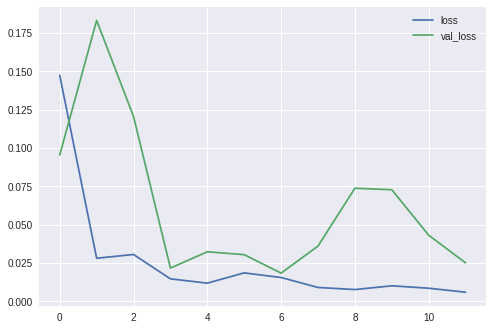

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
test_data = scaled_data[training_data_len - past_days: , :]

x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, :])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions

array([[47.81091 ],
       [47.42866 ],
       [47.129158],
       [46.908504],
       [46.744484],
       [46.67565 ],
       [46.71224 ],
       [46.79765 ],
       [46.612343],
       [46.16481 ],
       [45.404545],
       [44.62759 ],
       [43.940567],
       [43.390373],
       [43.035038],
       [42.87565 ],
       [42.879845],
       [43.011944],
       [43.267612],
       [43.585445],
       [43.9584  ],
       [44.340504],
       [44.75326 ],
       [45.205112],
       [45.382423],
       [45.27601 ],
       [44.97902 ],
       [44.614437],
       [44.095547],
       [43.664215],
       [43.474728],
       [43.49675 ],
       [43.84526 ],
       [44.476112],
       [45.28046 ],
       [46.116352],
       [47.043194],
       [47.951397]], dtype=float32)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  0.3825315696314755


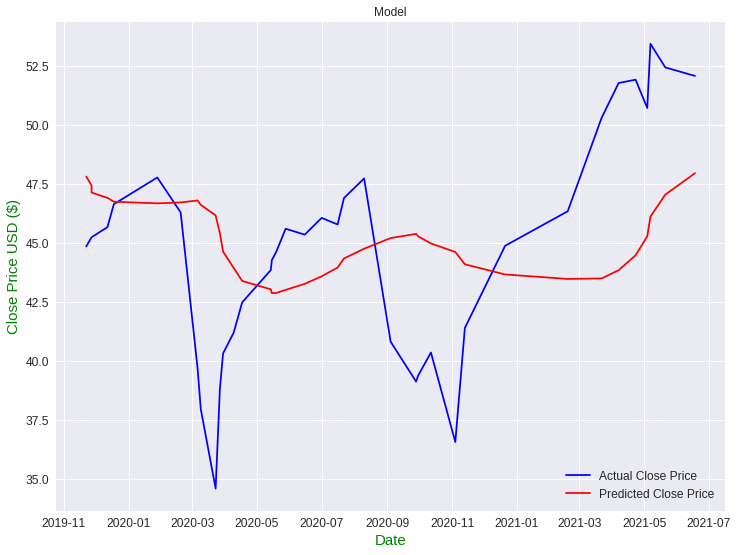

In [ ]:
import copy
valid = copy.deepcopy(df3[training_data_len:])
valid['Predictions'] = predictions
plt.figure(figsize=(12,9))
plt.title('Model')
plt.xlabel('Date', fontsize= 15, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 15, color = 'g')
plt.plot(valid['Close'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'],  color = 'red', label = 'Predicted Close Price')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
valid

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Predictions
Date,,,,,,,,,,
2019-11-22,44.85,0.9965,0.057,0.784,0.158,45.15,45.17,44.69,18725690,47.810909
2019-11-27,45.24,0.9895,0.073,0.801,0.127,45.36,45.42,44.93,14895010,47.428661
2019-11-27,45.24,0.9895,0.073,0.801,0.127,45.36,45.42,44.93,14895010,47.129158
2019-12-12,45.67,0.9956,0.058,0.798,0.143,44.55,45.77,44.41,27073510,46.908504
2019-12-18,46.64,0.9955,0.029,0.807,0.164,46.52,46.76,46.25,21928070,46.744484
2020-01-28,47.77,0.9986,0.038,0.808,0.154,47.52,47.97,47.50,14035050,46.675652
2020-02-19,46.29,0.9896,0.061,0.830,0.109,46.69,46.81,45.90,27626380,46.712238
2020-03-06,39.68,0.9806,0.081,0.813,0.106,38.00,39.95,37.80,48605590,46.797649
2020-03-09,37.96,0.9884,0.088,0.782,0.130,36.90,39.56,36.29,61535330,46.612343


In [ ]:
import datetime
last_day = df3.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-06-19 00:00:00


In [ ]:
new_df = df3.filter(['Close'])
last_20_days = new_df[-20: ].values
last_20_days_scaled = scaler.transform(last_20_days)

X_test = []
X_test.append(last_20_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print('Predicted Close Price for {} '.format(next_day) + ' = ', pred_price)

Predicted Close Price for 2021-06-19 00:00:00  =  [[48.784065]]


In [ ]:
previous = pred_price
previous_pred_price = new_df.at[str(last_day), 'Close']

In [ ]:
diff=(float)(pred_price - previous_pred_price)
if(diff < 0):
  print("percentage decrease = ",round(((- (diff)/previous_pred_price)*100),4))
else:
  print("percentage increase = ",round((( (diff)/previous_pred_price)*100),4))

percentage decrease =  6.3106
